In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import nbinom
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#read in villagers.csv file and store data into villagers 

villagers = pd.read_csv('/kaggle/input/villagers/villagers.csv')

# Data Collection and Cleaning

Retrieve villager and species information to determine the probability of finding a specific villager given the villager species and total number of species.

In [3]:
#print all the villagers and their info
print(villagers)

#count the number of total villagers
villagers_total = len(villagers)
print("The total amount of unique villagers: ", villagers_total)

         Name    Species  Gender Personality      Hobby Birthday Catchphrase  \
0     Admiral       Bird    Male      Cranky     Nature   27-Jan     aye aye   
1     Agent S   Squirrel  Female       Peppy    Fitness    2-Jul    sidekick   
2       Agnes        Pig  Female  Big Sister       Play   21-Apr     snuffle   
3          Al    Gorilla    Male        Lazy    Fitness   18-Oct     ayyyeee   
4     Alfonso  Alligator    Male        Lazy       Play    9-Jun    it'sa me   
..        ...        ...     ...         ...        ...      ...         ...   
386    Winnie      Horse  Female       Peppy    Fashion   31-Jan      hay-OK   
387  Wolfgang       Wolf    Male      Cranky  Education   25-Nov     snarrrl   
388      Yuka      Koala  Female      Snooty    Fashion   20-Jul     tsk tsk   
389      Zell       Deer    Male        Smug      Music    7-Jun       pronk   
390    Zucker    Octopus    Male        Lazy     Nature    8-Mar       bloop   

       Favorite Song Style 1   Style 2 

In [4]:
#print the amount of species 
species_total = len(pd.unique(villagers['Species']))

print("The total amount of unique species: ", species_total)

The total amount of unique species:  35


In [5]:
#select a unique villager
villager_name = 'Ankha'

#print the species of the selected villager
species = villagers[villagers.Name.isin([villager_name])].Species
print(species)

#print the total number of villagers given the species of the selected villager
villagers_given_species = (villagers['Species'] == 'Cat').sum()
print("The amount of villagers given the species: ", villagers_given_species)

12    Cat
Name: Species, dtype: object
The amount of villagers given the species:  23


# Data Analysis

Calculate the probability of finding the selected villager given the total amount of unique villagers and the total amount of villagers given the species of the selected villager

In [6]:
#Condition: find the probability of finding the selected villager, given you already have x number of the same species on your island
x = 0

prob = (1/species_total)*(1/(villagers_given_species-x))
print(prob)
print("The probability of finding %s during a villager hunt is: %s%%" % (villager_name, round(prob*100,2)))

0.0012422360248447203
The probability of finding Ankha during a villager hunt is: 0.12%


In [7]:
#Calculate the odds of finding a specific villager based on the number of tickets.
tickets = 100

#Each visit to an island is an independent bernoulli trial. To find the probability of finding the selected villager given a certain number of tickets, we
#must use a negative binomial distribution model, where we find the number of successes in multiple independent and identical bernoulli trials, which is
#finding the selected villager 

nmt_prob = nbinom.cdf(tickets, 1, prob)
print(nmt_prob)
rounded_nmt_prob = round(nmt_prob*100,2)
print("The probability of finding %s during a villager hunt given you have already have %s of the same species and %s tickets is: %s%%" % (villager_name, x, tickets,rounded_nmt_prob))


0.11798289716970702
The probability of finding Ankha during a villager hunt given you have already have 0 of the same species and 100 tickets is: 11.8%


# Data Visualization

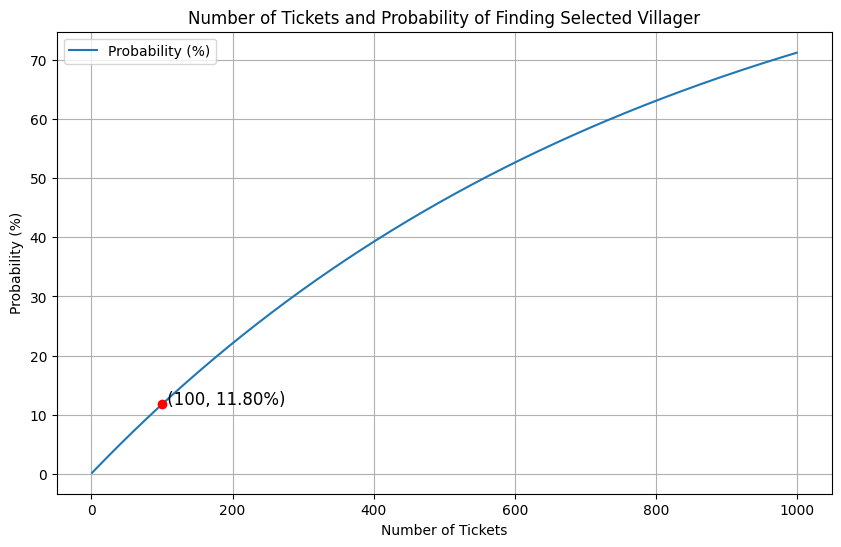

In [8]:
#As the number of tickets increase or decrease, what is the probability of finding the 
#selected villager?

#Graph that shows a relationship between the amount of nook mile tickets available
#and the probability of finding the given villager

ticket_range = np.arange(1, 1000)  # Ticket numbers from 1 to 100
probabilities = nbinom.cdf(ticket_range, 1, prob) * 100  # Convert to percentage

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(ticket_range, probabilities, label='Probability (%)')

# Optionally, mark a specific data point
tickets = 100
probability_percentage = nbinom.cdf(tickets, 1, prob) * 100
plt.scatter(tickets, probability_percentage, color='red', zorder=5)
plt.text(tickets, probability_percentage, f' ({tickets}, {probability_percentage:.2f}%)', fontsize=12, ha='left')

plt.title('Number of Tickets and Probability of Finding Selected Villager')
plt.xlabel('Number of Tickets')
plt.ylabel('Probability (%)')
plt.legend()
plt.grid(True)
plt.show()